In [25]:
# Step 1 --> Installing required packages
!pip install opencv-python numpy matplotlib torch torchvision ultralytics

Defaulting to user installation because normal site-packages is not writeable


In [26]:
# Step 2 --> Importing important libraries 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO
from collections import defaultdict


In [27]:
# Step 3 --> Loading pretrained YOLOv8 model 
model = YOLO("yolov8n.pt") 


In [28]:
# Step 4 --> Defining Vehicle Classes
# Class IDs in COCO for vehicles
TARGET_CLASSES = {'car': 2, 'motorcycle': 3, 'bus': 5, 'truck': 7}

# Reverse class name mapping
CLASS_NAMES = {v: k for k, v in TARGET_CLASSES.items()}

In [29]:
#Step 5 --> Defining Image Processing Function
def process_image(image_path, conf_threshold=0.3):  
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = model(img_rgb)[0]
    
    vehicle_counts = defaultdict(int)

    for box in results.boxes:
        cls_id = int(box.cls.item())
        conf = float(box.conf.item())
        if conf >= conf_threshold and cls_id in CLASS_NAMES:
            label = CLASS_NAMES[cls_id]
            vehicle_counts[label] += 1
            # Draw box
            xyxy = box.xyxy[0].cpu().numpy().astype(int)
            cv2.rectangle(img, (xyxy[0], xyxy[1]), (xyxy[2], xyxy[3]), (0, 255, 0), 2)
            text = f"{label} {conf:.2f}"
            cv2.putText(img, text, (xyxy[0], xyxy[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    return img, vehicle_counts


In [30]:
# Step 6 --> Batch Processing test images
input_folder = r"C:\Users\HP\Downloads\vehicle_traffic_dataset\vehicle_traffic_dataset\test data"
output_folder = r"C:\Users\HP\Downloads\vehicle_traffic_dataset\vehicle_traffic_dataset\output folder\processed images"
os.makedirs(output_folder, exist_ok=True)

summary_report = []

for image_name in os.listdir(input_folder):
    if image_name.lower().endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(input_folder, image_name)
        processed_img, counts = process_image(image_path)
        
        output_path = os.path.join(output_folder, f"annotated_{image_name}")
        cv2.imwrite(output_path, processed_img)

        report_row = {'image': image_name}
        for vehicle in TARGET_CLASSES:
            report_row[vehicle] = counts.get(vehicle, 0)
        summary_report.append(report_row)



0: 640x480 1 person, 1 traffic light, 114.4ms
Speed: 4.4ms preprocess, 114.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)

0: 480x640 9 cars, 1 bus, 2 traffic lights, 101.0ms
Speed: 3.8ms preprocess, 101.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 5 persons, 1 bicycle, 2 buss, 1 truck, 99.2ms
Speed: 2.0ms preprocess, 99.2ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 6 persons, 1 bus, 1 truck, 96.7ms
Speed: 2.8ms preprocess, 96.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 640x480 1 person, 94.8ms
Speed: 2.4ms preprocess, 94.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

0: 384x640 7 persons, 1 bus, 87.7ms
Speed: 1.6ms preprocess, 87.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 480x640 1 car, 130.0ms
Speed: 3.2ms preprocess, 130.0ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 3 persons

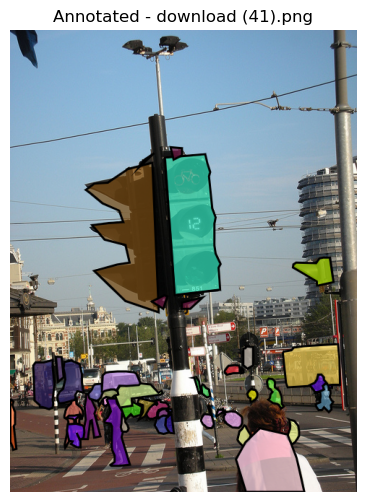

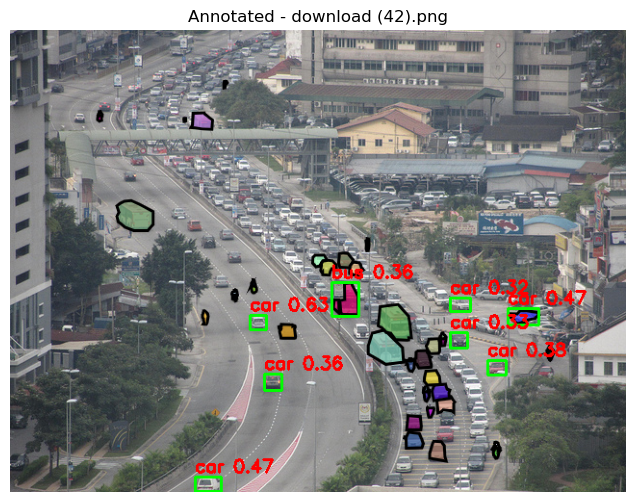

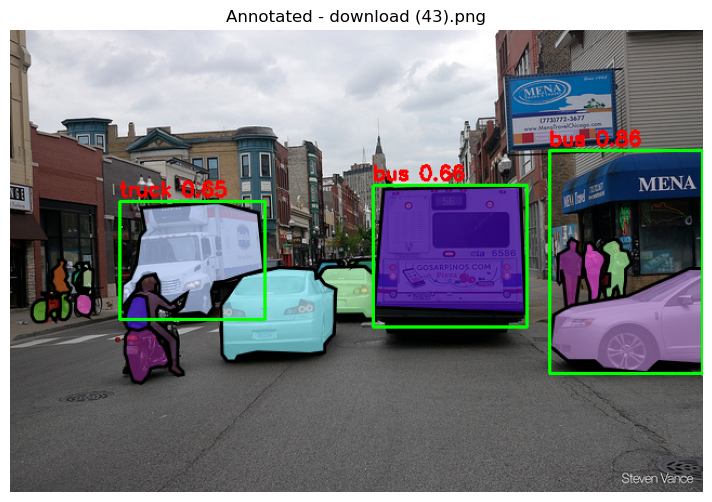

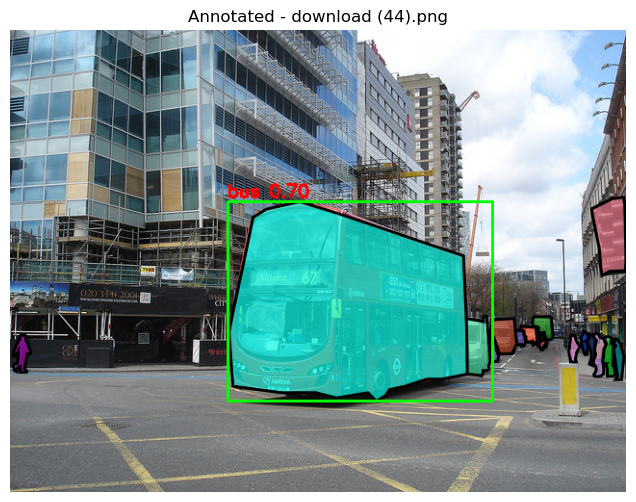

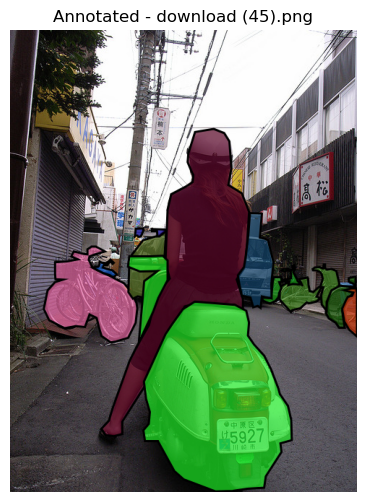

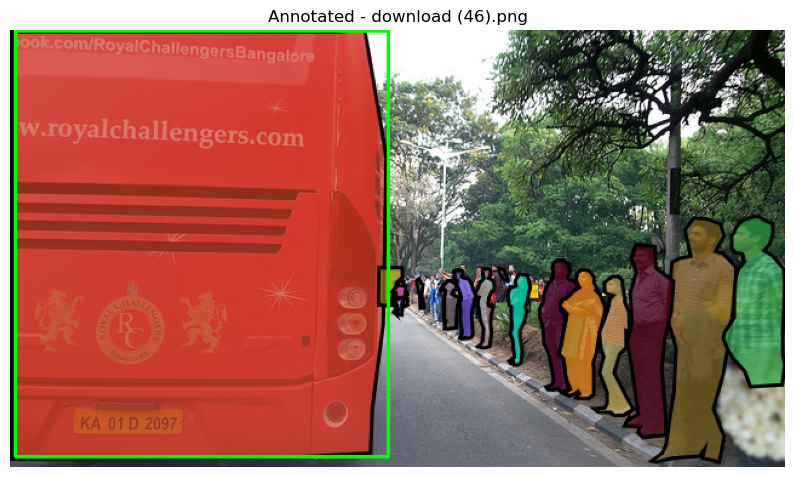

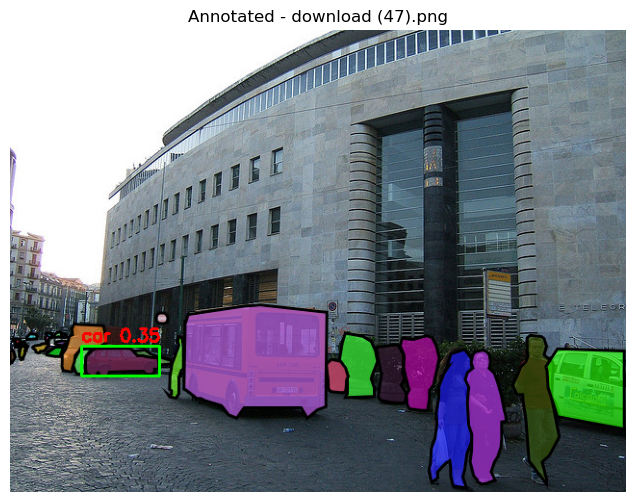

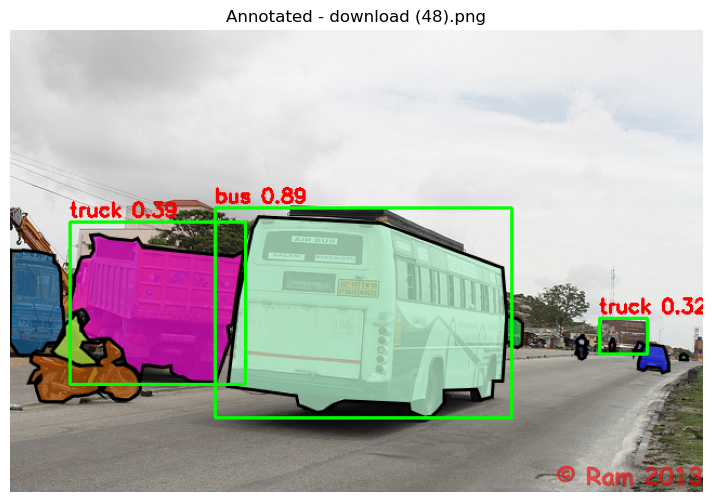

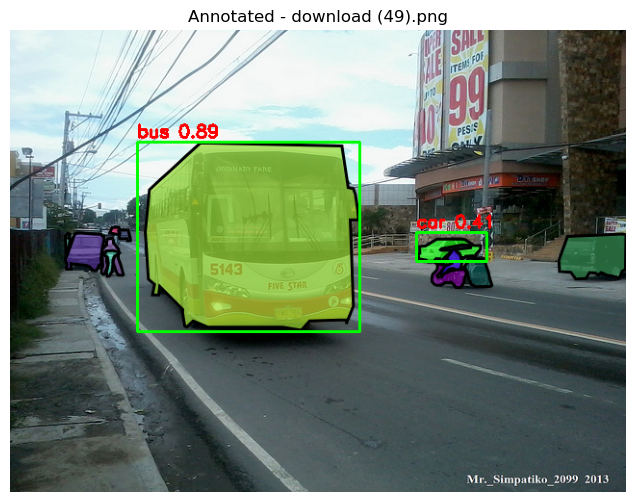

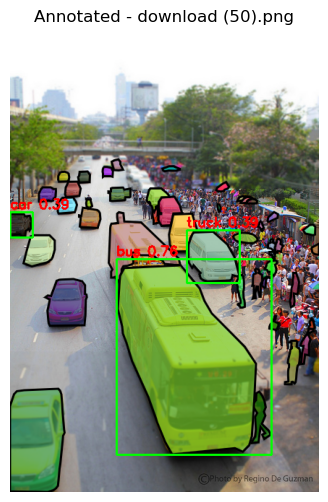

In [37]:
# Step 7 --> Visualization(View a sample image)
# Step 7 - Display multiple annotated images
import matplotlib.pyplot as plt

for row in summary_report:
    image_name = row['image']
    output_path = os.path.join(output_folder, f"annotated_{image_name}")
    img = cv2.imread(output_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.title(f"Annotated - {image_name}")
    plt.axis("off")
    plt.show()




Vehicle Count Summary Table:


image  car  motorcycle  bus  truck  Total
0  download (41).png    0           0    0      0      0
1  download (42).png    7           0    1      0      8
2  download (43).png    0           0    2      1      3
3  download (44).png    0           0    1      0      1
4  download (45).png    0           0    0      0      0
5  download (46).png    0           0    1      0      1
6  download (47).png    1           0    0      0      1
7  download (48).png    0           0    1      2      3
8  download (49).png    1           0    1      0      2
9  download (50).png    1           0    1      1      3

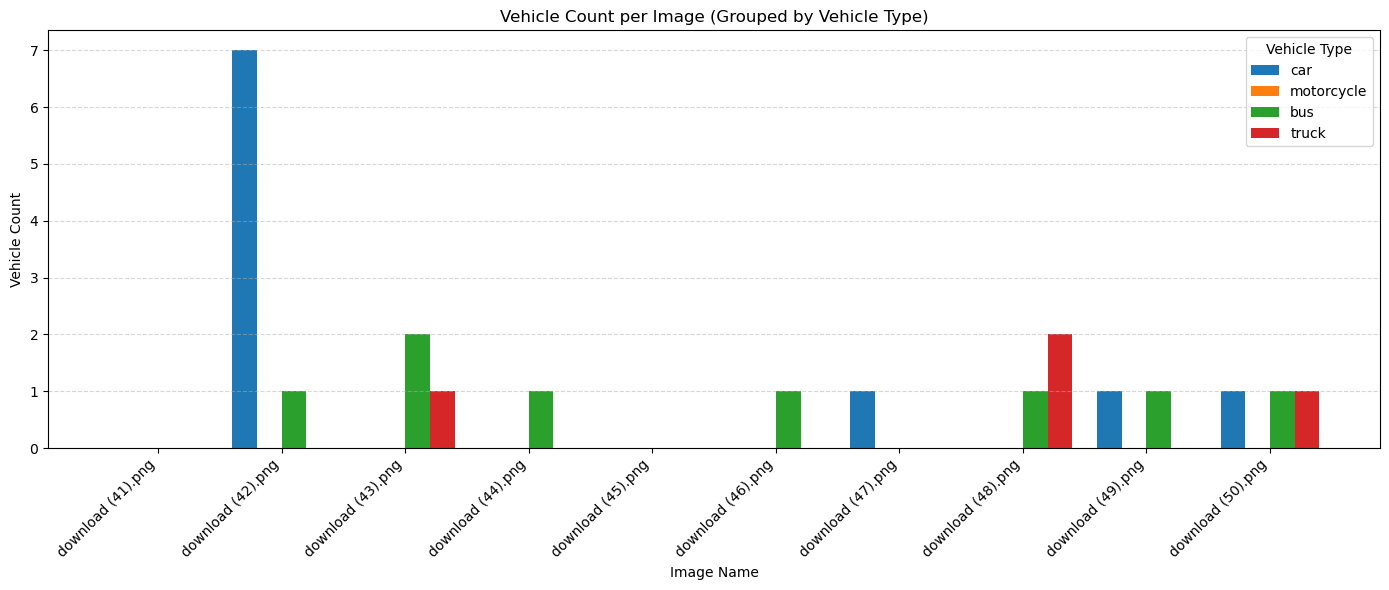

In [34]:
# Step 8 --> Generating Summary Report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert summary to DataFrame
summary_df = pd.DataFrame(summary_report)

# Add Total column
summary_df['Total'] = summary_df[['car', 'motorcycle', 'bus', 'truck']].sum(axis=1)

# Display the summary table
print("Vehicle Count Summary Table:")
display(summary_df)

# Grouped bar chart setup
vehicle_types = ['car', 'motorcycle', 'bus', 'truck']
x_labels = summary_df['image']
x = np.arange(len(x_labels))  # the label locations
bar_width = 0.2

# Plotting
plt.figure(figsize=(14, 6))

for i, vehicle in enumerate(vehicle_types):
    plt.bar(x + i * bar_width, summary_df[vehicle], width=bar_width, label=vehicle)

# Formatting the chart
plt.xlabel("Image Name")
plt.ylabel("Vehicle Count")
plt.title("Vehicle Count per Image (Grouped by Vehicle Type)")
plt.xticks(x + bar_width * 1.5, x_labels, rotation=45, ha='right')
plt.legend(title="Vehicle Type")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
